In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import quandl
quandl.ApiConfig.api_key = 'zHGS75_4j5ju47_ZcRLA'

In [2]:
#CO2 Päästöt Suomessa ja Kiinassa
fin = quandl.get('BP/C02_EMMISSIONS_FIN-Carbon-Dioxide-CO2-Emmissions-Finland')
ch = quandl.get('BP/C02_EMMISSIONS_CHN-Carbon-Dioxide-CO2-Emmissions-China')

In [3]:
ch.head()

,Value
Date,
1965-12-31,488.525419
1966-12-31,530.349045
1967-12-31,475.920674
1968-12-31,476.682790
1969-12-31,582.473700


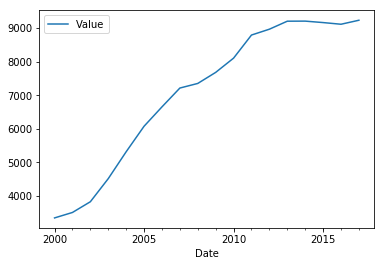

In [4]:
#Päästöjen kehitys Kiinassa 2000-luvulla
ch['2000':].plot()

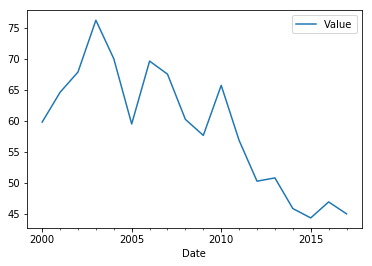

In [5]:
#Päästöjen kehitys Suomessa 2000-luvulla
fin['2000':].plot()

In [6]:
#Molemmat maat samaan dataframeen
fin_ch=pd.concat([ch['Value'], fin['Value']], axis=1)
fin_ch.columns=['Kiina','Suomi']
fin_ch.head()

,Kiina,Suomi
Date,,
1965-12-31,488.525419,24.778171
1966-12-31,530.349045,28.149069
1967-12-31,475.920674,28.927663
1968-12-31,476.682790,33.237189
1969-12-31,582.473700,38.998130


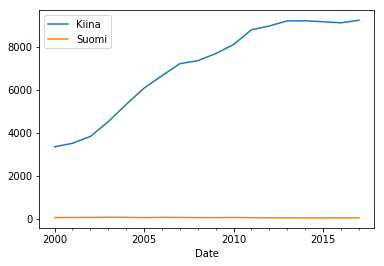

In [7]:
fin_ch['2000':].plot()

__Tarkastellaan seuraavaksi päästöjen muutoksia 2000-luvulla__

In [8]:
#Otetaan käsittelyyn datasta arvot vuodesta 2000 eteenpäin
fin_ch2=fin_ch['2000':]

In [9]:
#Tehdään uudet sarakkeet vertailu prosentille
fin_ch2['fin_muutos']=fin_ch2['Suomi'].pct_change()
fin_ch2['ch_muutos']=fin_ch2['Kiina'].pct_change()
fin_ch2.head()

C:\Users\JoelM\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\JoelM\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Kiina,Suomi,fin_muutos,ch_muutos
Date,,,,
2000-12-31,3349.658729,59.799972,NaN,NaN
2001-12-31,3511.837450,64.619577,0.080595,0.048416
2002-12-31,3830.957526,67.896299,0.050708,0.090870
2003-12-31,4518.474044,76.268240,0.123305,0.179463
2004-12-31,5318.420345,70.048855,-0.081546,0.177039


In [10]:
fin_ch2=fin_ch2.drop(['Kiina','Suomi'],axis=1)
fin_ch2.head()

,fin_muutos,ch_muutos
Date,,
2000-12-31,NaN,NaN
2001-12-31,0.080595,0.048416
2002-12-31,0.050708,0.090870
2003-12-31,0.123305,0.179463
2004-12-31,-0.081546,0.177039


[Text(0, 0, '-20 %'),
 Text(0, 0, '-15 %'),
 Text(0, 0, '-10 %'),
 Text(0, 0, '-5 %'),
 Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %')]

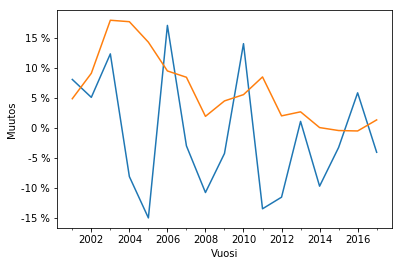

In [13]:
#Esitetään sama kuviossa
ax = fin_ch2.plot(legend=False)
plt.ylabel('Muutos',)
plt.xlabel('Vuosi')
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0f} %'.format(y*100) for y in vals])